We'll try to keep things simple here, and only introduce basic concepts. Later Colabs will cover more advanced problems.

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$


Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.


Instead, we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).
Then, we will train a model that figures out the above formula through the training process.

In [1]:
!pip install tensorflow

In [10]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Remember this is regression problem

# Set up training data

In [3]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(celsius_q):
  print("{} degress Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degress Celsius = -40.0 degrees Fahrenheit
-10.0 degress Celsius = 14.0 degrees Fahrenheit
0.0 degress Celsius = 32.0 degrees Fahrenheit
8.0 degress Celsius = 46.0 degrees Fahrenheit
15.0 degress Celsius = 59.0 degrees Fahrenheit
22.0 degress Celsius = 72.0 degrees Fahrenheit
38.0 degress Celsius = 100.0 degrees Fahrenheit


input_shape[1] - specifies that the input to this layer is single value.
units = 1 - this specifies the number of neurons in the layer

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

Once layers defines, they need to be assembed into a model.

In [5]:
model = tf.keras.Sequential([l0])

# Compile the model, with loss and optimizer functions

* Loss Function - a way of measuring how far off predictions are from the desired outcome.
* Optimizer function - a way of adjusting internal values in order to reduce the loss.

In [6]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

# Train the model


Train the model by calling the fit method

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Model training finished")

Model training finished


# Display training statistics

In [8]:
import matplotlib.pyplot as plt

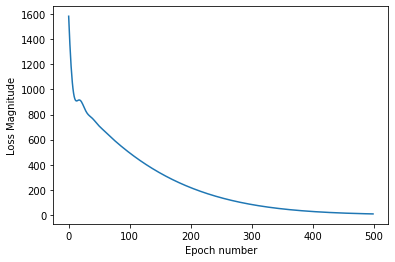

In [11]:
plt.xlabel('Epoch number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

# Predicting the model

In [ ]:
print(model.predict([100.0]))

[[211.30177]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)


# Looking at the layer weights

In [ ]:
l0.get_weights()

[array([[1.8254161]], dtype=float32), array([28.760166], dtype=float32)]

In [ ]:
print(model.predict([8]))

[[43.363495]]
